In [64]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 

In [65]:
df= pd.read_csv("/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [66]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [68]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [69]:
for i in ['Gender','family_history_with_overweight','SCC','FAVC','CAEC','SMOKE','CALC','MTRANS','NObeyesdad']:
    print(f"Unique values for columns {i} -> {df[i].unique()}")

Unique values for columns Gender -> ['Female' 'Male']
Unique values for columns family_history_with_overweight -> ['yes' 'no']
Unique values for columns SCC -> ['no' 'yes']
Unique values for columns FAVC -> ['no' 'yes']
Unique values for columns CAEC -> ['Sometimes' 'Frequently' 'Always' 'no']
Unique values for columns SMOKE -> ['no' 'yes']
Unique values for columns CALC -> ['no' 'Sometimes' 'Frequently' 'Always']
Unique values for columns MTRANS -> ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique values for columns NObeyesdad -> ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [70]:
df=pd.get_dummies(df,columns=['Gender','family_history_with_overweight','SCC','FAVC','CAEC','SMOKE','CALC','MTRANS'])
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SMOKE_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False


In [71]:
# Check the data types of each column
column_types = df.dtypes

# Print the data types of each column
print(column_types)

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
NObeyesdad                             object
Gender_Female                            bool
Gender_Male                              bool
family_history_with_overweight_no        bool
family_history_with_overweight_yes       bool
SCC_no                                   bool
SCC_yes                                  bool
FAVC_no                                  bool
FAVC_yes                                 bool
CAEC_Always                              bool
CAEC_Frequently                          bool
CAEC_Sometimes                           bool
CAEC_no                                  bool
SMOKE_no                          

In [72]:
for i in df.columns:
    if df[i].dtype in ['bool']:
        print(f"Converting bool to 0 and 1s for {i}")
        df[i] = df[i].astype(int)

Converting bool to 0 and 1s for Gender_Female
Converting bool to 0 and 1s for Gender_Male
Converting bool to 0 and 1s for family_history_with_overweight_no
Converting bool to 0 and 1s for family_history_with_overweight_yes
Converting bool to 0 and 1s for SCC_no
Converting bool to 0 and 1s for SCC_yes
Converting bool to 0 and 1s for FAVC_no
Converting bool to 0 and 1s for FAVC_yes
Converting bool to 0 and 1s for CAEC_Always
Converting bool to 0 and 1s for CAEC_Frequently
Converting bool to 0 and 1s for CAEC_Sometimes
Converting bool to 0 and 1s for CAEC_no
Converting bool to 0 and 1s for SMOKE_no
Converting bool to 0 and 1s for SMOKE_yes
Converting bool to 0 and 1s for CALC_Always
Converting bool to 0 and 1s for CALC_Frequently
Converting bool to 0 and 1s for CALC_Sometimes
Converting bool to 0 and 1s for CALC_no
Converting bool to 0 and 1s for MTRANS_Automobile
Converting bool to 0 and 1s for MTRANS_Bike
Converting bool to 0 and 1s for MTRANS_Motorbike
Converting bool to 0 and 1s for M

In [73]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SMOKE_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


In [74]:
# Check the data types of each column
column_types = df.dtypes

# Print the data types of each column
print(column_types)

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
NObeyesdad                             object
Gender_Female                           int64
Gender_Male                             int64
family_history_with_overweight_no       int64
family_history_with_overweight_yes      int64
SCC_no                                  int64
SCC_yes                                 int64
FAVC_no                                 int64
FAVC_yes                                int64
CAEC_Always                             int64
CAEC_Frequently                         int64
CAEC_Sometimes                          int64
CAEC_no                                 int64
SMOKE_no                          

In [75]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Display the first few rows of the dataframe to verify the transformation
df.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SMOKE_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,0,...,0,0,0,1,0,0,0,0,1,0


In [76]:
df['NObeyesdad'].unique(),len(df['NObeyesdad'].unique())

(array([1, 5, 6, 2, 0, 3, 4]), 7)

In [77]:
X=df.drop(columns=['NObeyesdad'])
y=df['NObeyesdad']
X.shape,y.shape

((2111, 31), (2111,))

In [78]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [89]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

def create_model_checkpoint(model_name,patience=5):
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=patience)
    checkpoint_callback = ModelCheckpoint(filepath=f"{model_name}.keras", monitor='val_loss', save_best_only=True)
    return [early_stopping_callback,checkpoint_callback]

In [93]:
model_tf = tf.keras.Sequential(
[
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])

In [94]:
model_tf.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
            metrics=['accuracy']
)

In [95]:
history=model_tf.fit(X_train,y_train,epochs=150,validation_data=(X_test,y_test),callbacks=create_model_checkpoint(model_name="model_1",patience=10))
print("Model trained")

Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2516 - loss: 8.8187 - val_accuracy: 0.3735 - val_loss: 1.2733
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4184 - loss: 1.2689 - val_accuracy: 0.5816 - val_loss: 0.9733
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4761 - loss: 1.1409 - val_accuracy: 0.6501 - val_loss: 0.8916
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5759 - loss: 0.9211 - val_accuracy: 0.6785 - val_loss: 0.7886
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5809 - loss: 0.9345 - val_accuracy: 0.6265 - val_loss: 0.8751
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6271 - loss: 0.8264 - val_accuracy: 0.7092 - val_loss: 0.6780
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6130 - loss: 0.8735 - val_accuracy: 0.6525 - val_loss: 0.7095
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6541 - loss: 0.7690 - val_accuracy: 0.6454 - v

<Axes: >

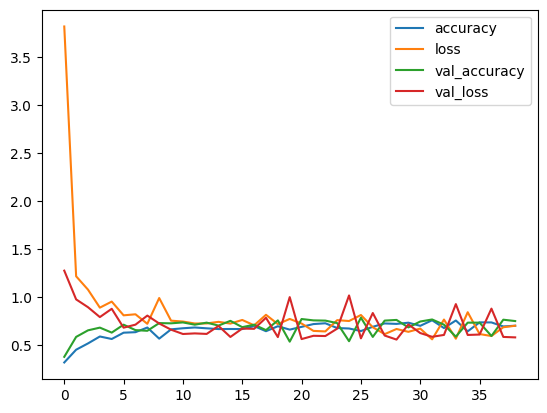

In [109]:
pd.DataFrame(history.history).plot()

# After normalizing the data

In [96]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00
NObeyesdad,2111.0,3.015632,1.952090,0.00,1.000000,3.000000,5.000000,6.00
Gender_Female,2111.0,0.494079,0.500083,0.00,0.000000,0.000000,1.000000,1.00


In [97]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'salary' column
df['Age'] = scaler.fit_transform(df[['Age']])
df['Height'] = scaler.fit_transform(df[['Height']])
df['Weight'] = scaler.fit_transform(df[['Weight']])
df['FCVC'] = scaler.fit_transform(df[['FCVC']])
df['NCP'] = scaler.fit_transform(df[['NCP']])
df['CH2O'] = scaler.fit_transform(df[['CH2O']])
df['FAF'] = scaler.fit_transform(df[['FAF']])
df['TUE'] = scaler.fit_transform(df[['TUE']])
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SMOKE_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,1,1,...,0,0,0,0,1,0,0,0,1,0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,1,1,...,1,0,0,1,0,0,0,0,1,0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,5,0,...,0,0,1,0,0,0,0,0,0,1
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,6,0,...,0,0,0,1,0,0,0,0,1,0


In [98]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,0.219417,0.135021,0.0,0.126536,0.186764,0.255319,1.0
Height,2111.0,0.474863,0.176047,0.0,0.339623,0.472640,0.600875,1.0
Weight,2111.0,0.355120,0.195457,0.0,0.197562,0.328358,0.510677,1.0
FCVC,2111.0,0.709522,0.266963,0.0,0.500000,0.692751,1.000000,1.0
NCP,2111.0,0.561876,0.259346,0.0,0.552913,0.666667,0.666667,1.0
CH2O,2111.0,0.504006,0.306477,0.0,0.292406,0.500000,0.738710,1.0
FAF,2111.0,0.336766,0.283531,0.0,0.041502,0.333333,0.555559,1.0
TUE,2111.0,0.328933,0.304464,0.0,0.000000,0.312675,0.500000,1.0
NObeyesdad,2111.0,3.015632,1.952090,0.0,1.000000,3.000000,5.000000,6.0
Gender_Female,2111.0,0.494079,0.500083,0.0,0.000000,0.000000,1.000000,1.0


In [99]:
X=df.drop(columns=['NObeyesdad'])
y=df['NObeyesdad']
X.shape,y.shape

((2111, 31), (2111,))

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [101]:
tf.random.set_seed(42)
model_2tf = tf.keras.Sequential(
[
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(rate=0.02),
    tf.keras.layers.Dense(7,activation='softmax')
])

In [102]:
model_2tf.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
            metrics=['accuracy']
)

In [103]:
history2=model_2tf.fit(X_train,y_train,epochs=150,validation_data=(X_test,y_test),callbacks=create_model_checkpoint(model_name="model_2",patience=10))
print("Model trained")

Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2134 - loss: 2.0328 - val_accuracy: 0.4397 - val_loss: 1.2022
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5070 - loss: 1.1237 - val_accuracy: 0.6856 - val_loss: 0.7794
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5972 - loss: 0.9287 - val_accuracy: 0.5839 - val_loss: 0.8349
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6014 - loss: 0.8594 - val_accuracy: 0.6572 - val_loss: 0.8019
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6554 - loss: 0.7969 - val_accuracy: 0.7021 - val_loss: 0.7331
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6530 - loss: 0.8319 - val_accuracy: 0.7565 - val_loss: 0.5495
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7538 - loss: 0.5599 - val_accuracy: 0.6076 - val_loss: 0.8049
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7493 - loss: 0.6080 - val_accuracy: 0.6879 - v

<Axes: >

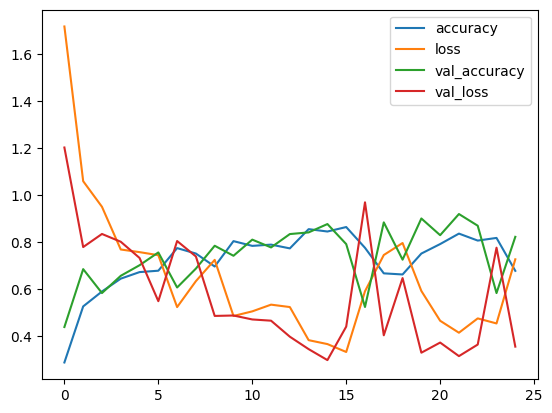

In [108]:
pd.DataFrame(history2.history).plot()

In [105]:
# Loading the best model
best_model_1 =  tf.keras.models.load_model('model_2.keras')
loss,accuracy = best_model_1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.2620  
Model loss on the test set: 0.2992022931575775
Model accuracy on the test set: 87.71%


In [106]:
best_model_1.save("best_model.h5")